<a href="https://colab.research.google.com/github/riccardoorru/painting_genre_recognition/blob/main/2_Dataset_Balancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random
from google.colab import drive
from google.colab import files
import shutil

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from numpy.random import seed
import pickle
seed(1)
tf.random.set_seed(1)



In [ ]:
from google.colab import drive
drive.mount('RiccardoOrruProject', force_remount=True)

Mounted at RiccardoOrruProject


In [ ]:
def take_classes_size(directory):
  classes_size=[]
  classes_name=[]
  for dir in os.listdir(directory):
    #print(directory+"/"+dir)
    dir_size=0
    for dir2 in  os.listdir(directory+"/"+dir):
      dir_size=dir_size+len(os.listdir(directory+"/"+dir+"/"+dir2))
    classes_size.append(dir_size)
    classes_name.append(dir)
    print(dir+": ",dir_size)
    dir_size=0
  return classes_name,classes_size

In [ ]:
#I percorsi sono diversi in quanto la cartella è stata rinominata per la consegna
# [Deep Learning Project] = Orru
root_path = "RiccardoOrruProject/MyDrive/Deep Learning Project"
dataset_dir = os.path.join(root_path, "Dataset")
train_dir = os.path.join(dataset_dir, 'train/genre')
test_dir = os.path.join(dataset_dir, 'val/genre')
balanced_train_dir = "RiccardoOrruProject/MyDrive/Deep Learning Project/Dataset/balanced_train"
balanced_test_dir = "RiccardoOrruProject/MyDrive/Deep Learning Project/Dataset/balanced_test"

In [ ]:
classes_name, classes_size = take_classes_size(train_dir)
print("\nTotal paintings train:", sum(classes_size))
print("\n\n\n");
classes_name, classes_size = take_classes_size(test_dir)
print("\nTotal paintings test:", sum(classes_size))

Surrealism:  305
Cubism:  351
Post-Impressionism:  1097
Symbolism:  384
Romanticism:  232
Expressionism:  304
Abstractionism:  150
Baroque:  209
High-Renaissance:  204
Mannerism:  204
Primitivism:  191
Pop-Art:  144
Early-Renaissance:  131
Impressionism:  2288

Total paintings train: 6194




High-Renaissance:  51
Abstractionism:  38
Surrealism:  77
Baroque:  53
Expressionism:  77
Post-Impressionism:  277
Symbolism:  98
Cubism:  88
Romanticism:  59
Early-Renaissance:  33
Mannerism:  51
Pop-Art:  37
Primitivism:  48
Impressionism:  577

Total paintings test: 1564


In [ ]:
genre150 = pd.read_csv('RiccardoOrruProject/MyDrive/Deep Learning Project/Dataset/genre150.csv')
genre150

,genre,artists,nPaintings,weight
0,Mannerism,['Titian'],255,2.173109
1,Abstractionism,['Paul Klee'],188,2.947568
2,High-Renaissance,['Titian'],255,2.173109
3,Primitivism,['Marc Chagall'],239,2.318589
4,Cubism,['Pablo Picasso'],439,1.262284
5,Romanticism,['Francisco Goya'],291,1.904271
6,Expressionism,"['Amedeo Modigliani', 'Paul Klee']",381,1.454443
7,Symbolism,"['Mikhail Vrubel', 'Paul Gauguin']",482,1.149674
8,Early-Renaissance,['Sandro Botticelli'],164,3.378920
9,Pop-Art,['Andy Warhol'],181,3.061563


In [ ]:
def elimina_sottocartelle_vuote(cartella_principale):
    for root, dirs, files in os.walk(cartella_principale, topdown=False):
        for dir in dirs:
            cartella_da_controllare = os.path.join(root, dir)
            if is_folder_empty(cartella_da_controllare):
                os.rmdir(cartella_da_controllare)

def is_folder_empty(folder_path):
    files = os.listdir(folder_path)
    return len(files) == 0

In [ ]:
elimina_sottocartelle_vuote(train_dir)
elimina_sottocartelle_vuote(test_dir)
elimina_sottocartelle_vuote(balanced_train_dir)
elimina_sottocartelle_vuote(balanced_test_dir)

In [ ]:
train_dir

'RiccardoOrruProject/MyDrive/Deep Learning Project/Dataset/train/genre'


Create new training directory for Data Augmentation

Let's create a new directory copying the train and test directories:


In [ ]:
# Verifica se la lista dei file è vuota
if not os.path.exists(balanced_train_dir) or len(balanced_train_dir) == 0:
  shutil.copytree(train_dir, balanced_train_dir)

In [ ]:
#shutil.rmtree("RiccardoOrruProject/MyDrive/Deep Learning Project/Dataset/balanced_test")
#shutil.rmtree("RiccardoOrruProject/MyDrive/Deep Learning Project/Dataset/balanced_train")

In [ ]:
if not os.path.exists(balanced_test_dir) or len(balanced_test_dir) == 0:
  shutil.copytree(test_dir, balanced_test_dir)

In [ ]:
#drive.flush_and_unmount() #Sync with Drive

#drive.mount('RiccardoOrruProject', force_remount=True)

In [ ]:
classes_name, classes_size = take_classes_size(balanced_train_dir)
print("\nTotal paintings train:", sum(classes_size))
print("\n\n\n");
classes_name, classes_size = take_classes_size(balanced_test_dir)
print("\nTotal paintings test:", sum(classes_size))

Romanticism:  450
Primitivism:  450
Baroque:  450
Symbolism:  450
Expressionism:  450
Early-Renaissance:  450
Cubism:  450
Abstractionism:  450
Mannerism:  450
Pop-Art:  450
High-Renaissance:  450
Surrealism:  450
Post-Impressionism:  450
Impressionism:  450

Total paintings train: 6300




High-Renaissance:  51
Abstractionism:  38
Surrealism:  77
Baroque:  53
Expressionism:  77
Post-Impressionism:  277
Symbolism:  98
Cubism:  88
Romanticism:  59
Early-Renaissance:  33
Mannerism:  51
Pop-Art:  37
Primitivism:  48
Impressionism:  577

Total paintings test: 1564


In [ ]:
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"), # Applies horizontal flipping to a random 50% of the images
  layers.RandomRotation(0.1), # Rotates the input images by a random value in the range[–10%, +10%] (fraction of full circle [-36°, 36°])
  layers.RandomZoom(0.2) # Zooms in or out of the image by a random factor in the range [-20%, +20%]
])

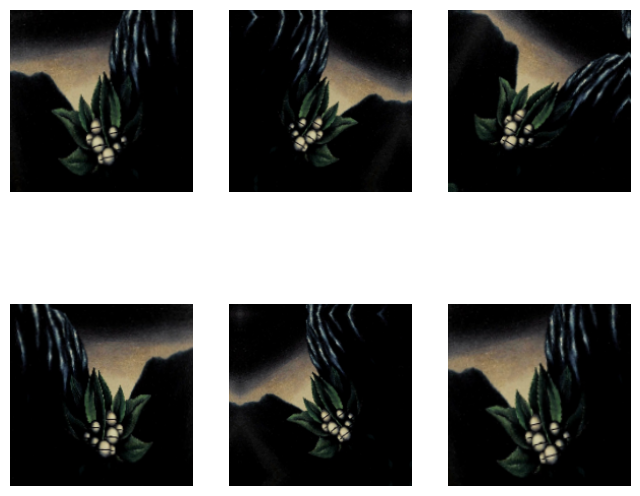

In [ ]:
#example for data agumentation

IMAGE_HEIGHT =IMAGE_WIDTH= 180

for genre_name in os.listdir(train_dir):
  for artist_name in os.listdir(train_dir+"/"+genre_name):
    for image_name in os.listdir(train_dir+"/"+genre_name+"/"+artist_name):

      img = tf.keras.utils.load_img(train_dir+"/"+genre_name+"/"+artist_name+"/"+image_name,
      target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))

      img_array = tf.keras.utils.img_to_array(img)
      # plt.imshow(img_array.astype("uint8"))

      plt.figure(figsize=(8, 7))
      for i in range(6):
        augmented_image = data_augmentation(img_array)
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(augmented_image.numpy().astype("uint8"))
        plt.axis("off")
      break
    break
  break

In [ ]:
import os
import tensorflow as tf
import random

# Number of minimum and maximum number of samples that we want for each class
min_number_of_samples = 450
max_number_of_samples = 450

# Function to generate augmented images for a given folder
def generate_augmented_images(folder, n_samples_to_be_added):
    images = os.listdir(folder)
    n_images_added_counter = 0

    while n_images_added_counter < n_samples_to_be_added:
        for image_name in images:
            if n_images_added_counter >= n_samples_to_be_added:
                break

            # Load the image
            img = tf.keras.utils.load_img(os.path.join(folder, image_name), target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))

            # Cast, create an augmented image based on the current image and add it to the class folder
            img_array = tf.keras.utils.img_to_array(img)
            augmented_image = data_augmentation(img_array)  # Create a single augmented image

            # Save the augmented image
            tf.keras.utils.save_img(os.path.join(balanced_train_dir, genre_name, artist_name, f"{n_images_added_counter}_augm.jpg"), augmented_image)

            n_images_added_counter += 1

# Loop through genre folders
for genre_name in os.listdir(balanced_train_dir):
    genre_folder = os.path.join(balanced_train_dir, genre_name)
    if os.path.isdir(genre_folder):
        images = []
        # Loop through artist folders
        for artist_name in os.listdir(genre_folder):
            artist_folder = os.path.join(genre_folder, artist_name)
            if os.path.isdir(artist_folder):
                images += [os.path.join(artist_folder, image_name) for image_name in os.listdir(artist_folder)]

        num_images = len(images)
        n_samples_to_be_added = max(0, min_number_of_samples - num_images)
        n_samples_to_be_removed = max(0, num_images - max_number_of_samples)

        # Generate additional augmented images using your specific algorithm
        if n_samples_to_be_added > 0:
            generate_augmented_images(artist_folder, n_samples_to_be_added)

        # Remove excess images
        if n_samples_to_be_removed > 0:
            random.shuffle(images)
            images_to_remove = images[:n_samples_to_be_removed]
            for image_to_remove in images_to_remove:
                os.remove(image_to_remove)


In [ ]:
classes_name, classes_size = take_classes_size(balanced_train_dir)

Romanticism:  450
Primitivism:  450
Baroque:  450
Symbolism:  450
Expressionism:  450
Early-Renaissance:  450
Cubism:  450
Abstractionism:  450
Mannerism:  450
Pop-Art:  450
High-Renaissance:  450
Surrealism:  450
Post-Impressionism:  450
Impressionism:  450


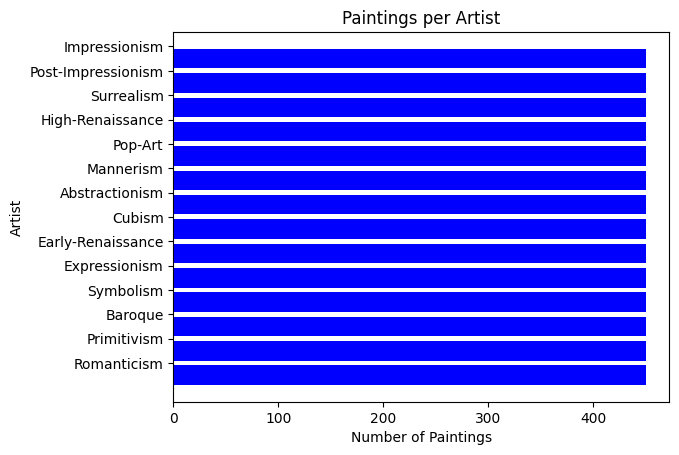

In [ ]:
artists_list= classes_name
N_paintings_list = classes_size

length = len(artists_list)

plt.yticks(np.arange(length) + .5, artists_list, rotation=0)
plt.ylabel("Artist")
plt.xlabel('Number of Paintings')
plt.title('Paintings per Artist')

plt.barh(artists_list, N_paintings_list, color='blue', label='Number of Painting by Artist')
plt.show()


